# Eigenbirds
## A variation on the Eigenfaces exercise

In [114]:
from cv2 import imread
import numpy as np
from math import pi
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [115]:
# Here the pictures are read in as a grayscale image array; 
# they are then made into column vectors and added to a large matrix A.

# Make an empty matrix A that can accomodate 16 200x150 pixel images that get turned into column vectors
A = np.empty([30000, 16])

In [116]:
for i in np.arange(1, 9):
    bird = imread("images/raven/raven" + str(i) + ".jpg", 0) # read in as grayscale
    bird = bird.flatten() # turned into a column vector
    A[:, i - 1] = bird # added to A
    
for i in np.arange(1, 9):
    bird = imread("images/oriole/oriole" + str(i) + ".jpg", 0) # read in as grayscale
    bird = bird.flatten() # turned into a column vector
    A[:, i+7] = bird # added to A


<IPython.core.display.Javascript object>


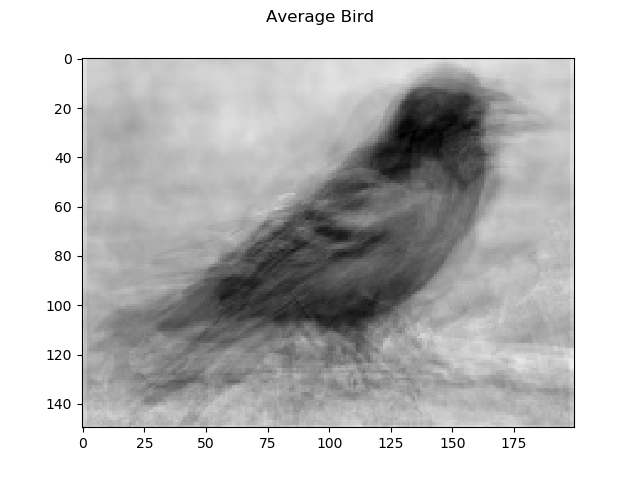

In [117]:
# Subtracting off the row means from each column

row_avg = np.mean(A, axis=1)
row_avg = row_avg.reshape((30000, 1))
plt.imshow(row_avg.reshape((150, 200)), "gray")
plt.show
plt.suptitle("Average Bird")
B = A - row_avg

In [118]:
# Compute the SVD on the mean subtracted matrix B, which is the same as PCA, where the columns
# of U are the principal components.

U, S, Vt = np.linalg.svd(B, False)

<IPython.core.display.Javascript object>


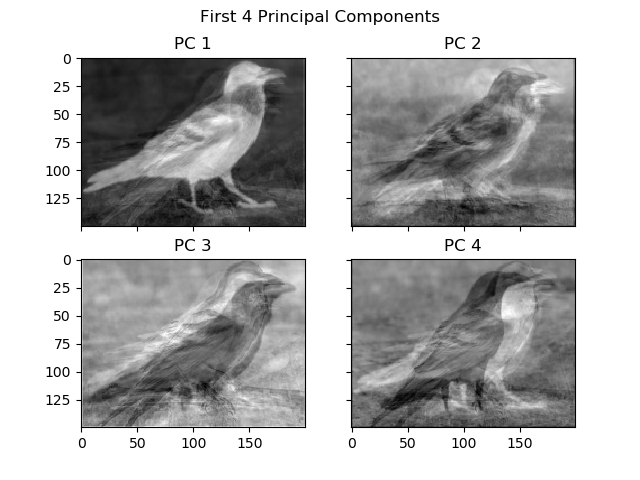

In [119]:
# Taking out the first 4 principal components of A.

PC1 = U[:, 0].reshape(150, 200)
PC2 = U[:, 1].reshape(150, 200)
PC3 = U[:, 2].reshape(150, 200)
PC4 = U[:, 3].reshape(150, 200)

fig, ax = plt.subplots(2, 2)
fig.suptitle("First 4 Principal Components")
ax[0, 0].imshow(PC1, "gray")
ax[0, 0].set_title("PC 1")
ax[0, 1].imshow(PC2, "gray")
ax[0, 1].set_title("PC 2")
ax[1, 0].imshow(PC3, "gray")
ax[1, 0].set_title("PC 3")
ax[1, 1].imshow(PC4, "gray")
ax[1, 1].set_title("PC 4")

for ax in ax.flat:
    ax.label_outer()

In [120]:
total_var = np.sum(S)
percentage_var = S / total_var
print(percentage_var)

[1.97766340e-01 8.36415968e-02 8.11543234e-02 7.57680386e-02
 6.68470734e-02 6.30249282e-02 5.78013540e-02 5.60154942e-02
 5.51377180e-02 5.11544108e-02 4.70149735e-02 4.48149982e-02
 4.22178483e-02 3.96861338e-02 3.79547683e-02 2.02803702e-17]


In [121]:
# The images are projected onto the first four principal components, found in the matrix U.
# This yeilds vectors with coefficients that reveal the linear combinations of the 
# principal components that each original picture is made of.

U1_4 = np.column_stack((U[:, 0], U[:, 1], U[:, 2], U[:, 3], U[:, 4]))
projected = np.empty([5, 16])
for i in np.arange(0, 16):
    projected[:, i] = np.matmul(B[:, i].reshape(1, 30000), U1_4)

<IPython.core.display.Javascript object>


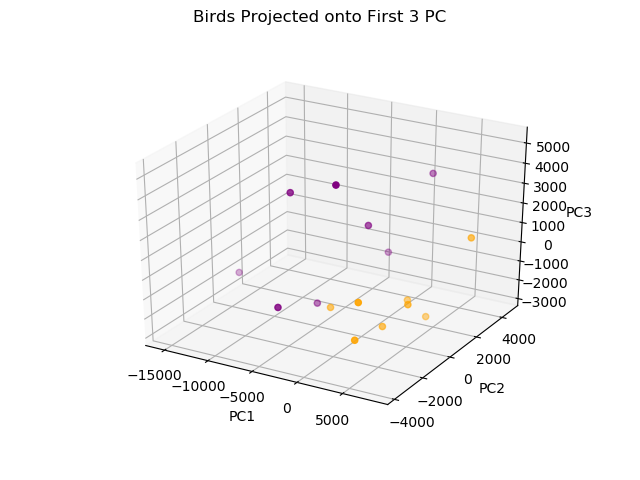

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = ["purple"] * 8 + ["orange"] * 8
ax.scatter(projected[0, :], projected[1, :], projected[2, :], color = c)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.suptitle("Birds Projected onto First 3 PC")
plt.show()

In [123]:
raven_PC = (np.mean(projected[:, 0:8], axis = 1))
oriole_PC = (np.mean(projected[:, 9:15], axis = 1))
bird_PC = np.vstack([raven_PC, oriole_PC])
bird_PC = (bird_PC.T)

df = pd.DataFrame({'group':["Raven", "Oriole"], 'PC1' : bird_PC[0, :], 
                   'PC2' : bird_PC[1, :], 'PC3' : bird_PC[2, :], 'PC4' : bird_PC[3, :],
                  'PC5' : bird_PC[4, :]})
N = 5
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax1 = plt.subplot(111, polar = True)
ax1.set_theta_offset(pi / 2)
plt.xticks(angles[:-1], list(df)[1:])
ax1.set_rlabel_position(0)

values = df.loc[0].drop("group").values.flatten().tolist()
values += values[:1]
ax1.plot(angles, values, linewidth=1, linestyle="solid", label = "Raven", color = "purple")

values = df.loc[1].drop("group").values.flatten().tolist()
values += values[:1]
ax1.plot(angles, values, linewidth=1, linestyle="solid", label = "Oriole", color = "orange")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.suptitle("Bird Makeup by Principal Component")

Text(0.5, 0.98, 'Bird Makeup by Principal Component')